In [1]:
%run ./utils.ipynb

In [2]:
estado_1 = 'RS'
municipio_1 = '4314902'

In [3]:
estado_2 = 'SP'
municipio_2 = '3550308'

In [5]:
n_iteracoes = 100
n_jobs = 1
backend = "loky"

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
csv_path = "Agregados_por_setores_cor_ou_raca_BR_csv/Agregados_por_setores_cor_ou_raca_BR.csv"

In [8]:
shp_path = f"{estado_1}_setores_CD2022/{estado_1}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_1)
all_segs_city_1 = calculate_seg(merged_df)

Dissimilarity: 0.36938877371482537
Spatial Dissimilarity: 0.2862184030564052
Gini: 0.48854095748836385
Entropy: 0.12980799191107342
Isolation: 0.36469467525756316
Dist. Decay Isolation: 0.32391461781522224
Rel. Concentration: -0.10650809891200008
Rel. Centralization: -0.10156531362133592
Rel. Clustering: 0.5956711862979596


In [9]:
shp_path = f"{estado_2}_setores_CD2022/{estado_2}_setores_CD2022.shp"
merged_df = process_mun(shp_path, csv_path, municipio_2)
all_segs_city_2 = calculate_seg(merged_df)

Dissimilarity: 0.3398172360204867
Spatial Dissimilarity: 0.2348804947548332
Gini: 0.45562522324826166
Entropy: 0.12483947527466109
Isolation: 0.5233691348393611
Dist. Decay Isolation: 0.48471768954446676
Rel. Concentration: -0.020331429031083845
Rel. Centralization: -0.3029313482466023
Rel. Clustering: 0.289159771315173


In [10]:
#approach = 'random_label'
#graph_file_name = f"figures/grid_plot_{municipio_1}_vs_{municipio_2}_{approach}.png"
#
## Memory optimization approaches:
#
## 1. Process fewer segments at once
## Instead of running all comparisons at once, process them in smaller batches
#comparisons = []
#
## 2. Use more memory-efficient parameters
## Reduce iterations_under_null if possible
#n_iteracoes_reduced = min(n_iteracoes, 1000)  # Reduce number of iterations if it's very high
#
## 3. Use chunking to process data
#for i in range(9):
#    # Optional: Use a try-except block to handle potential memory errors
#    try:
#        compare = inference.TwoValueTest(
#            all_segs_city_1[i], 
#            all_segs_city_2[i], 
#            null_approach=approach, 
#            iterations_under_null=n_iteracoes_reduced,
#            n_jobs=n_jobs, 
#            backend=backend
#        )
#        comparisons.append(compare)
#        
#        # 4. Force garbage collection after each heavy computation
#        import gc
#        gc.collect()
#        
#    except MemoryError:
#        print(f"Skipping comparison {i} due to memory constraints")
#        comparisons.append(None)
#
## 5. Only render plots for successful comparisons
#valid_comparisons = [comp for comp in comparisons if comp is not None]
#render_plots_as_grid_and_save(valid_comparisons, filename=graph_file_name)
#
## 6. Alternative approach if the above still fails:
## Consider downsampling your data before analysis
## Example: all_segs_city_1[i] = all_segs_city_1[i].sample(frac=0.5, random_state=42)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

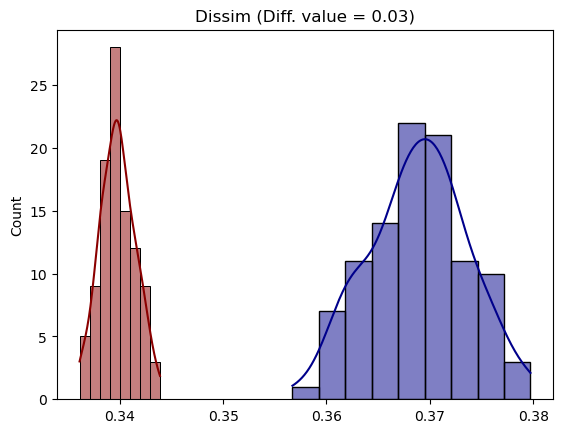

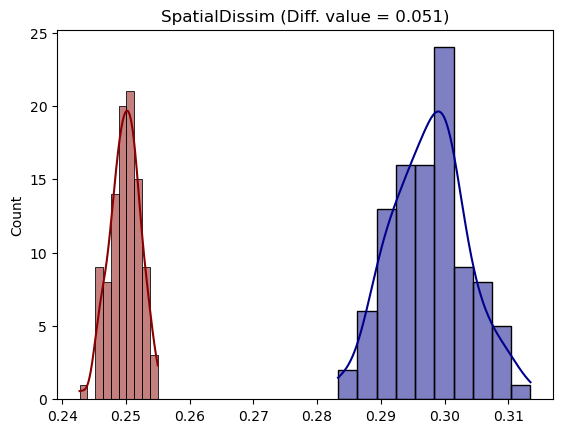

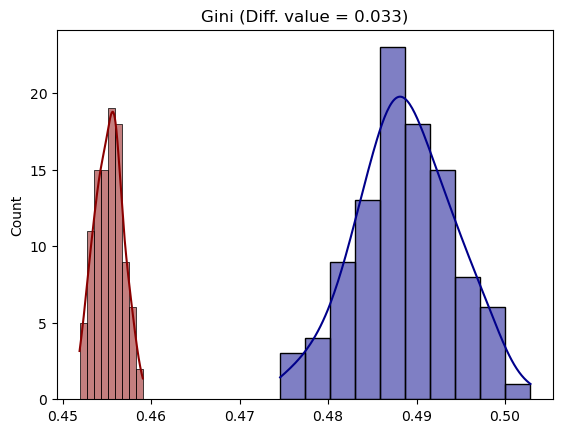

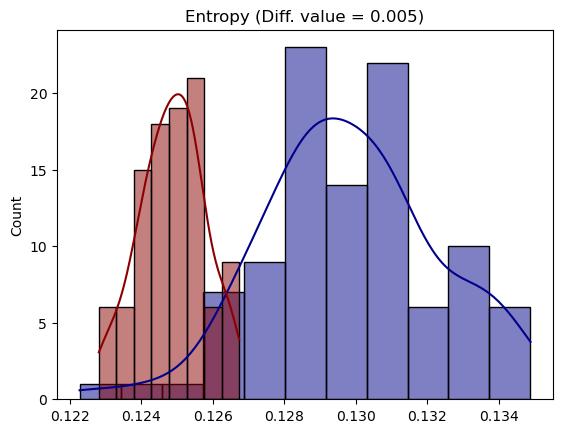

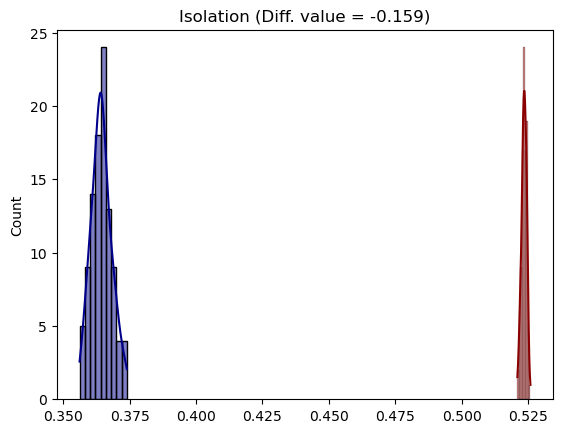

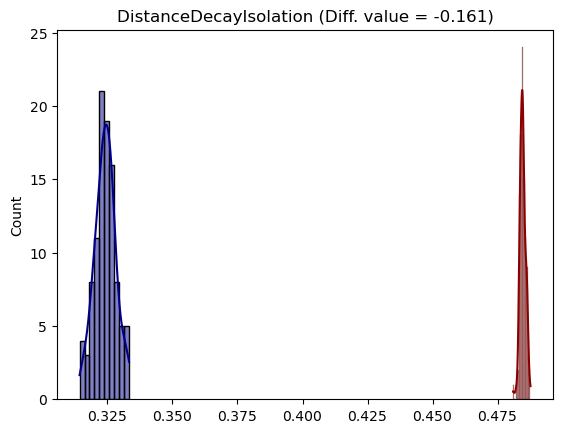

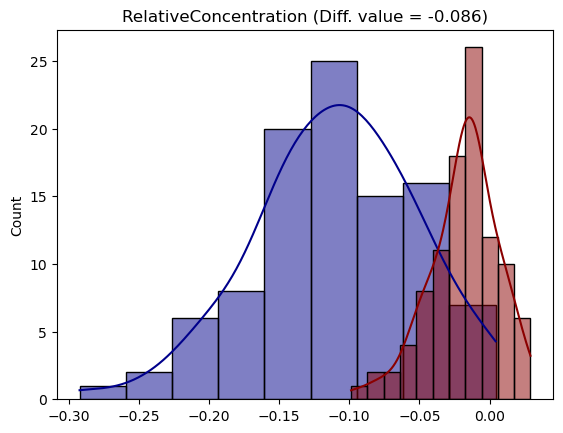

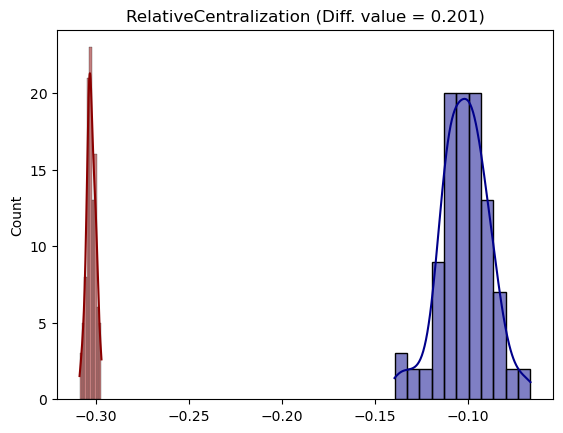

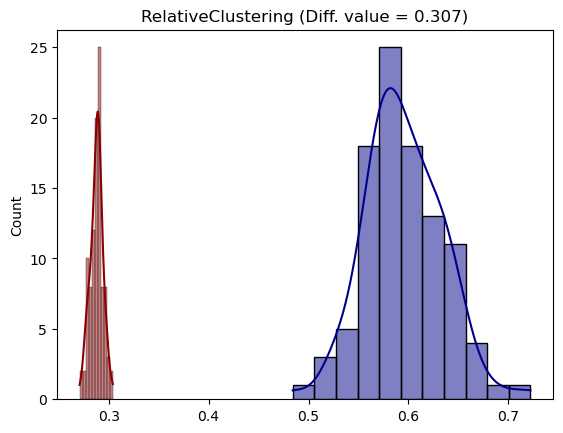

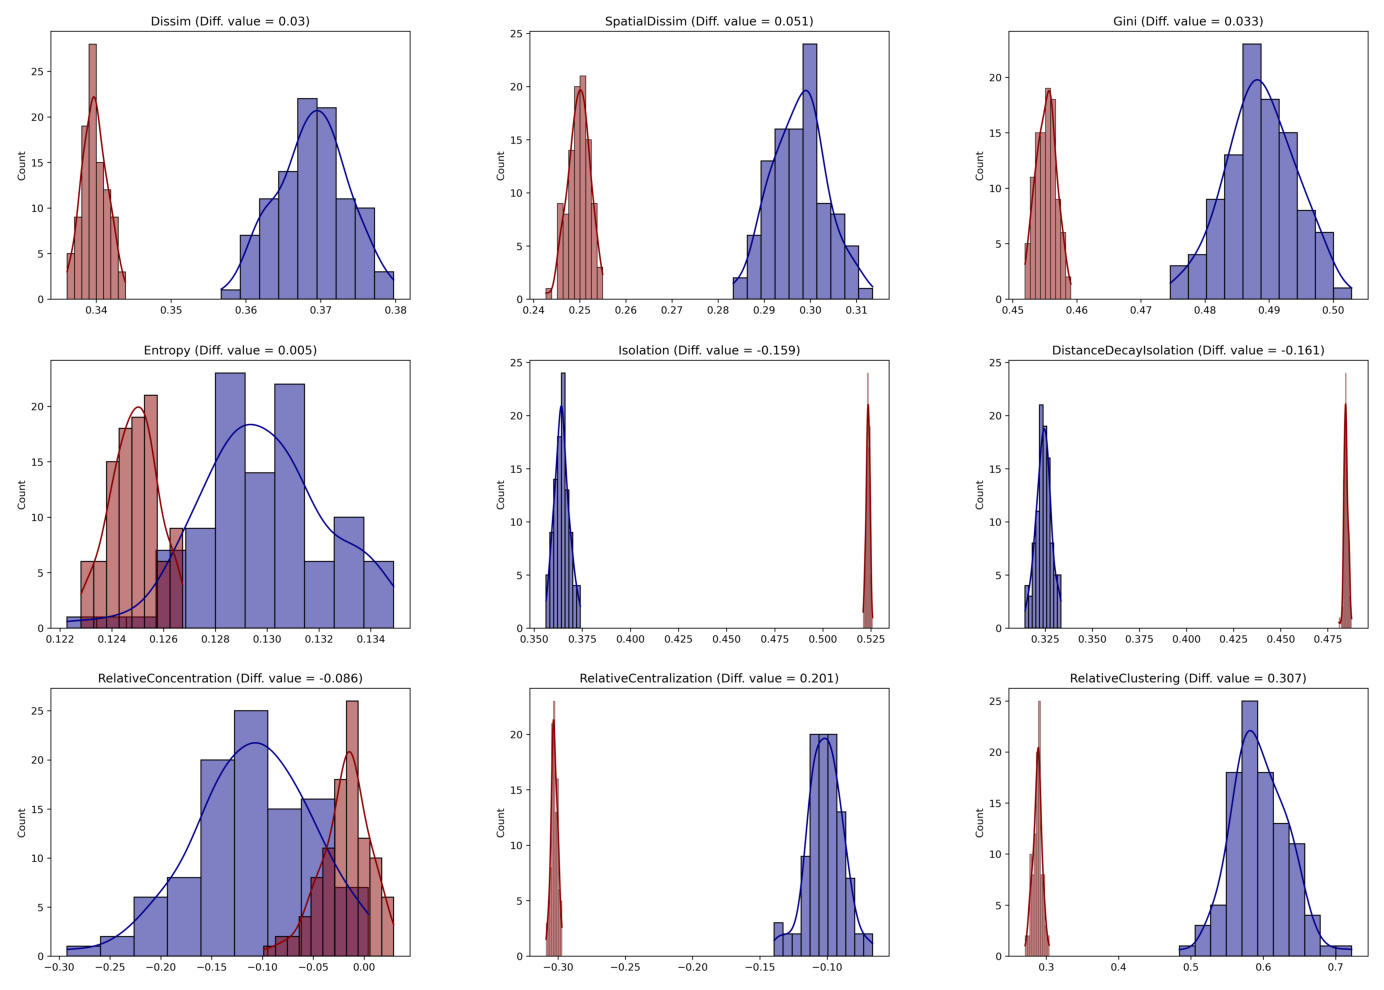

Figure saved to: C:\Users\renan\OneDrive\Documentos\GitHub\segregation_brazil_pysal\grid_plot_4314902_vs_3550308_bootstrap.png


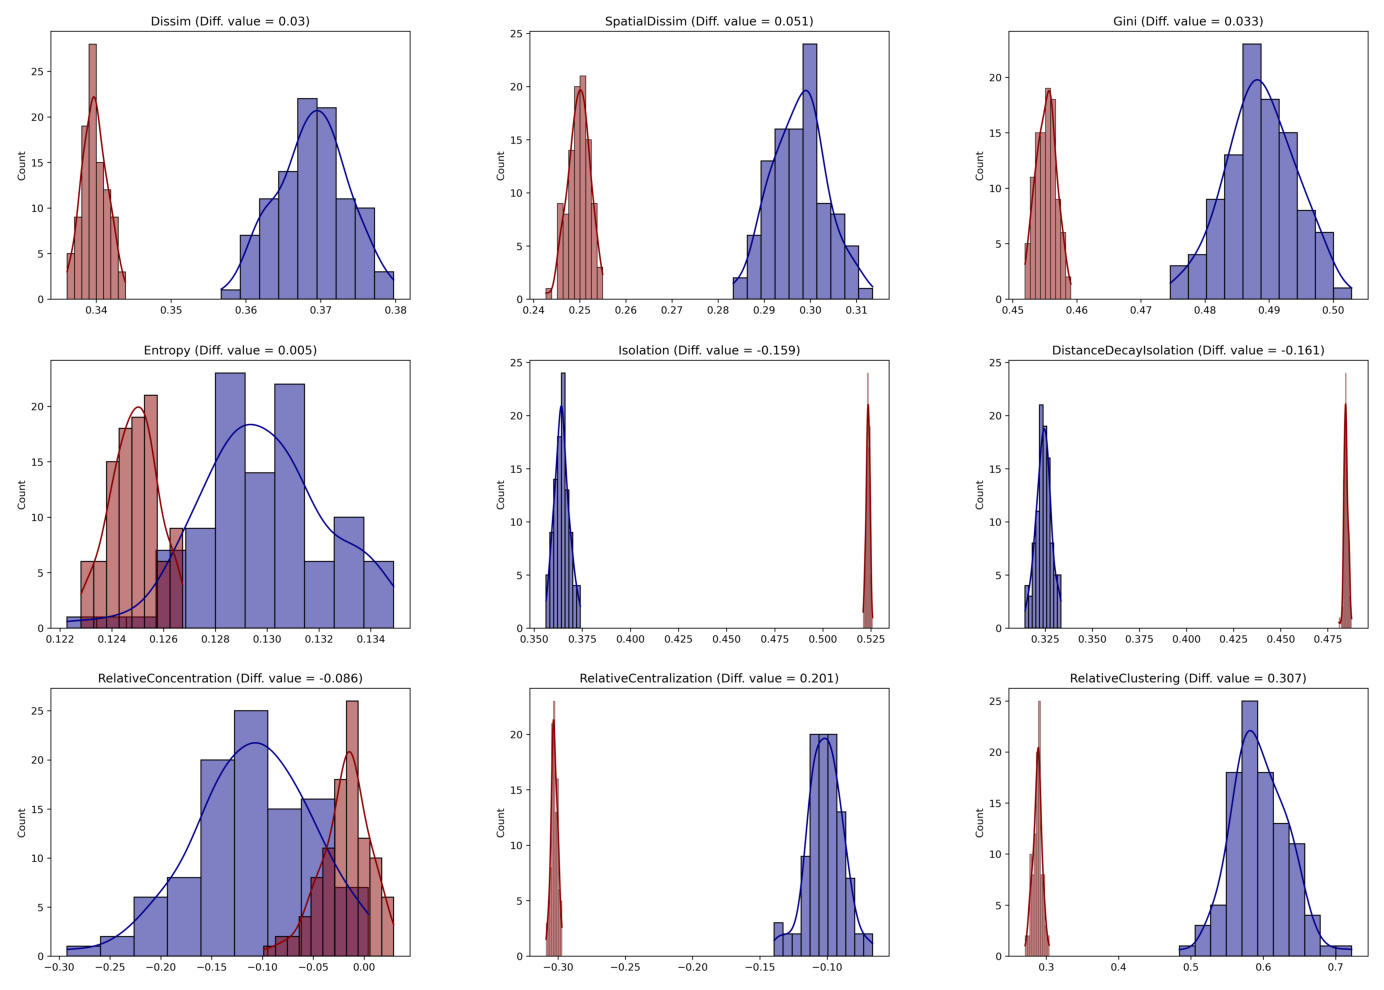

In [11]:
approach = 'bootstrap'
graph_file_name = f"figures/grid_plot_{municipio_1}_vs_{municipio_2}_{approach}.png"

# Memory optimization approaches:

# 1. Process fewer segments at once
# Instead of running all comparisons at once, process them in smaller batches
comparisons = []

# 2. Use more memory-efficient parameters
# Reduce iterations_under_null if possible
n_iteracoes_reduced = min(n_iteracoes, 1000)  # Reduce number of iterations if it's very high

# 3. Use chunking to process data
for i in range(9):
    # Optional: Use a try-except block to handle potential memory errors
    try:
        compare = inference.TwoValueTest(
            all_segs_city_1[i], 
            all_segs_city_2[i], 
            null_approach=approach, 
            iterations_under_null=n_iteracoes_reduced,
            n_jobs=n_jobs, 
            backend=backend
        )
        comparisons.append(compare)
        
        # 4. Force garbage collection after each heavy computation
        import gc
        gc.collect()
        
    except MemoryError:
        print(f"Skipping comparison {i} due to memory constraints")
        comparisons.append(None)

# 5. Only render plots for successful comparisons
valid_comparisons = [comp for comp in comparisons if comp is not None]
render_plots_as_grid_and_save(valid_comparisons, filename=graph_file_name)

# 6. Alternative approach if the above still fails:
# Consider downsampling your data before analysis
# Example: all_segs_city_1[i] = all_segs_city_1[i].sample(frac=0.5, random_state=42)

In [12]:
#approach = 'bootstrap'
#graph_file_name = f"grid_plot_{municipio_1}_vs_{municipio_2}_{approach}.png"
#
#compare_0 = inference.TwoValueTest(all_segs_city_1[0], all_segs_city_2[0], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_1 = inference.TwoValueTest(all_segs_city_1[1], all_segs_city_2[1], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_2 = inference.TwoValueTest(all_segs_city_1[2], all_segs_city_2[2], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_3 = inference.TwoValueTest(all_segs_city_1[3], all_segs_city_2[3], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_4 = inference.TwoValueTest(all_segs_city_1[4], all_segs_city_2[4], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_5 = inference.TwoValueTest(all_segs_city_1[5], all_segs_city_2[5], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_6 = inference.TwoValueTest(all_segs_city_1[6], all_segs_city_2[6], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_7 = inference.TwoValueTest(all_segs_city_1[7], all_segs_city_2[7], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_8 = inference.TwoValueTest(all_segs_city_1[8], all_segs_city_2[8], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#
#render_plots_as_grid_and_save([compare_0,compare_1,compare_2,compare_3,compare_4,compare_5,compare_6,compare_7,compare_8,], filename=graph_file_name)

In [13]:
#approach = 'random_label'
#graph_file_name = f"grid_plot_{municipio_1}_vs_{municipio_2}_{approach}.png"#

#compare_0 = inference.TwoValueTest(all_segs_city_1[0], all_segs_city_2[0], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_1 = inference.TwoValueTest(all_segs_city_1[1], all_segs_city_2[1], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_2 = inference.TwoValueTest(all_segs_city_1[2], all_segs_city_2[2], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_3 = inference.TwoValueTest(all_segs_city_1[3], all_segs_city_2[3], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_4 = inference.TwoValueTest(all_segs_city_1[4], all_segs_city_2[4], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_5 = inference.TwoValueTest(all_segs_city_1[5], all_segs_city_2[5], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_6 = inference.TwoValueTest(all_segs_city_1[6], all_segs_city_2[6], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_7 = inference.TwoValueTest(all_segs_city_1[7], all_segs_city_2[7], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)
#compare_8 = inference.TwoValueTest(all_segs_city_1[8], all_segs_city_2[8], null_approach=approach, iterations_under_null=n_iteracoes, n_jobs = n_jobs, backend = backend)#

#render_plots_as_grid_and_save([compare_0,compare_1,compare_2,compare_3,compare_4,compare_5,compare_6,compare_7,compare_8,], filename=graph_file_name)